## Collect weather data for 500 cities and plot

In [626]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from ratelimit import limits
import openweathermapy.core as owm

## Create Base URL

In [627]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

## Add API Key

In [628]:
# Import API key
api_key = "852305aaf0b662497d868eb7f882c53a"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Collect List of Random Cities using Citipy

In [629]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [630]:
# List for holding lat_lngs and cities and json responses
lat_lngs = []
cities = []
json_response = []

In [634]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=900)
lngs = np.random.uniform(low=-180.000, high=180.000, size=900)
lat_lngs = zip(lats, lngs)

In [635]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

In [636]:
# Print the city count to confirm sufficient count
print(len(cities))
cities_df = pd.DataFrame(cities)
cities_df.columns = ['city']
print(cities_df.head())
print(cities)

664
               city
0        nouakchott
1          navolato
2       arkhangelsk
3  illoqqortoormiut
4        rio grande
['nouakchott', 'navolato', 'arkhangelsk', 'illoqqortoormiut', 'rio grande', 'san policarpo', 'viligili', 'teshie', 'chuy', 'cidreira', 'labuhan', 'pangnirtung', 'lompoc', 'rikitea', 'bluff', 'nurobod', 'breves', 'rovaniemi', 'cherskiy', 'bethel', 'plettenberg bay', 'ishigaki', 'ushuaia', 'katsuura', 'palabuhanratu', 'elko', 'punta arenas', 'lagoa', 'port alfred', 'okha', 'karaul', 'manbij', 'nalut', 'taolanaro', 'catamarca', 'aldan', 'vaini', 'ilulissat', 'chokurdakh', 'carnarvon', 'pisco', 'avera', 'coihaique', 'isangel', 'hobart', 'kodiak', 'chapleau', 'tura', 'saleaula', 'iqaluit', 'wahran', 'arman', 'tuktoyaktuk', 'victoria', 'kavieng', 'lypova dolyna', 'belushya guba', 'boone', 'mataura', 'mahebourg', 'puerto ayora', 'monrovia', 'yellowknife', 'hermanus', 'avarua', 'rio gallegos', 'ust-tsilma', 'ancud', 'udachnyy', 'ribeira grande', 'ugoofaaru', 'husavik', 't

## Build Query

In [637]:
# Build partial query URL
url =  f"{url}appid={api_key}&units={units}&q="

## Create placeholders for data

In [638]:
# set up lists to hold reponse info
lat_d = []
temp = []
clouds = []
humid = []
countries = []
wind = []
lng_d = []

## Loop through cities

In [641]:
# Loop through the list of cities and perform a request for data on each

print(f"Beginning Weather Data Collection")
print(f"*************************************************")


for city in cities:
   
    try:
        response = requests.get(url + city).json()
        print(f"Collecting weather data for {city}...please stand by")
        
    
     #Append lists 
        json_response.append(response)
        lat_d.append(response['coord']['lat'])     
        lng_d.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        clouds.append(response['clouds']['all'])
        humid.append(response['main']['humidity'])
        countries.append(response['sys']['country'])
        wind.append(response['wind']['speed'])
 
       
   
        
    except KeyError:
        print("Data not found....skipping")      
    time.sleep(3)
print("done")

# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat_d,
    "long": lng_d,
    "countries": countries,
    "temp": temp,
    "clouds": clouds,
    "humidity": humid, 
    "windspeed_mph": wind
            }

Beginning Weather Data Collection
*************************************************
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping


Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping


Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping


Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping


Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
Data not found....skipping
done


## Create dictionary with data

In [601]:
weather_dict

{'city': ['barrow',
  'avarua',
  'belushya guba',
  'saskylakh',
  'nikolskoye',
  'atuona',
  'ponta do sol',
  'ushuaia',
  'busselton',
  'eureka',
  'arraial do cabo',
  'taolanaro',
  'burica',
  'punta arenas',
  'san jeronimo',
  'cayenne',
  'bushehr',
  'urla',
  'illoqqortoormiut',
  'hobart',
  'longyearbyen',
  'port elizabeth',
  'tasiilaq',
  'cherskiy',
  'tuatapere'],
 'lat': [-38.31,
  -21.21,
  71.97,
  59.7,
  -9.8,
  -20.63,
  -54.81,
  -33.64,
  40.8,
  -22.97,
  -53.16,
  -13.65,
  4.94,
  28.97,
  38.32,
  -42.88,
  78.22,
  39.31,
  65.61,
  68.75,
  -46.13],
 'long': [-60.23,
  -159.78,
  114.09,
  30.79,
  -139.03,
  -46,
  -68.31,
  115.35,
  -124.16,
  -42.02,
  -70.91,
  -73.37,
  -52.33,
  50.84,
  26.77,
  147.33,
  15.63,
  -74.98,
  -37.64,
  161.3,
  167.69],
 'countries': ['AR',
  'CK',
  'RU',
  'RU',
  'PF',
  'BR',
  'AR',
  'AU',
  'US',
  'BR',
  'CL',
  'PE',
  'GF',
  'IR',
  'TR',
  'AU',
  'NO',
  'US',
  'GL',
  'RU',
  'NZ'],
 'temp': [67.

In [602]:
#Create dataFrame
weather_df = pd.DataFrame.from_dict(weather_dict)
weather_df

ValueError: arrays must all be same length

## Plot Data

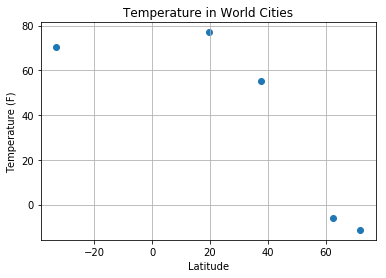

In [450]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

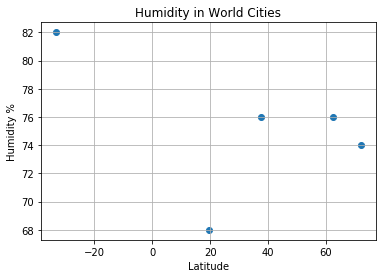

In [433]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

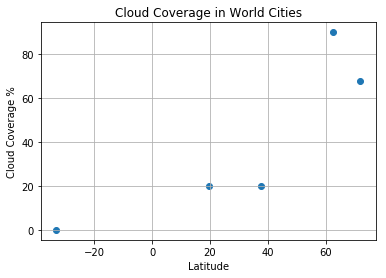

In [434]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloud Coverage in World Cities")
plt.ylabel("Cloud Coverage %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities.png")

# Show plot
plt.show()

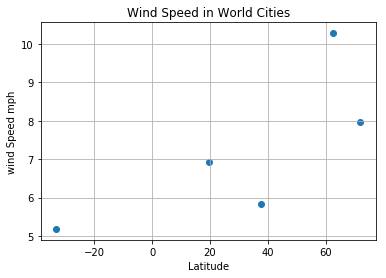

In [435]:
# Build a scatter plot for each data type
plt.scatter(weather_df["lat"], weather_df["windspeed_mph"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windInWorldCities.png")

# Show plot
plt.show()